#                           Naive Bayes on Titanic Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load Dataset
df=pd.read_csv("S:/Evacity Course/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check for missing values

df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].mean()

29.69911764705882

In [8]:
# handle missing values

df['Age']=df['Age'].fillna(df['Age'].mean())

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Handling categorical data 

dummies_sex=pd.get_dummies(df['Sex'], drop_first=True)

In [13]:
dummies_Embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [14]:
dummies_sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
dummies_Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [17]:
df=pd.concat([df, dummies_sex, dummies_Embark], axis=1)

In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
# Split the data as train and test

X=df.drop('Survived', axis=1)

In [20]:
y=df['Survived']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
df.shape

(891, 9)

In [34]:
X_train.shape

(623, 8)

In [35]:
X_test.shape

(268, 8)

### Apply Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [37]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
model.score(X_test,y_test)

0.7910447761194029

In [29]:
X_test[0:10]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
205,3,2.000000,0,1,10.4625,0,0,1
44,3,19.000000,0,0,7.8792,0,1,0
821,3,27.000000,0,0,8.6625,1,0,1
458,2,50.000000,0,0,10.5000,0,0,1
795,2,39.000000,0,0,13.0000,1,0,1
118,1,24.000000,0,1,247.5208,1,0,0
424,3,18.000000,1,1,20.2125,1,0,1
678,3,43.000000,1,6,46.9000,0,0,1
269,1,35.000000,0,0,135.6333,0,0,1
229,3,29.699118,3,1,25.4667,0,0,1


In [30]:
y_test[0:10]

205    0
44     1
821    1
458    1
795    0
118    0
424    0
678    0
269    1
229    0
Name: Survived, dtype: int64

In [31]:
model.predict(X_test[0:10])

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [55]:
y_pred=model.predict(X_test)

In [56]:
# Evaluation

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       159
           1       0.75      0.68      0.71       109

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [58]:
cm=confusion_matrix(y_test, y_pred)

Text(70.0, 0.5, 'Actual')

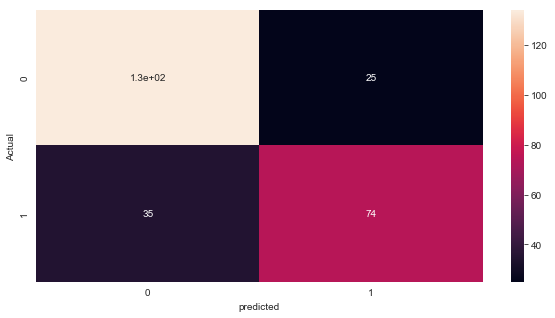

In [70]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')